# Data Exploration and Visualization
The objective of this exercise is to explore a dataset that contains information from customers of a telephone company (`data.csv`). We will analyze the features in the dataset and try to determine which of these features are good indicators of customer churn (that is, loss of customers).

### Part 1: Exploring the Dataset

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv('data.csv')

In [3]:
# Display the first three rows of the dataset
data.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


**Task 01 (of 15): Display the first three rows and the first three columns of the dataset using the `iloc` and `loc` methods.**
_Hint:_ Remember that the `iloc` method is used for indexing by integer position and the `loc` method is used for indexing by label.

In [4]:
data.iloc[:3,:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415


In [5]:
data.loc[[0,1,2],['State','Account length','Area code']]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415


**Task 02 (of 15): Determine the dimensionality of the dataset. Then, display information (data types, number of values) about the features in the dataset.**
_Hint:_ Use methods `shape` and `info`.

In [6]:
data.shape

(3333, 20)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   State                       3333 non-null   object 
 1   Account length              3333 non-null   int64  
 2   Area code                   3333 non-null   int64  
 3   International plan          3333 non-null   object 
 4   Voice mail plan             3333 non-null   object 
 5   Number voice mail messages  3333 non-null   int64  
 6   Total day minutes           3333 non-null   float64
 7   Total day calls             3333 non-null   int64  
 8   Total day charge            3333 non-null   float64
 9   Total eve minutes           3333 non-null   float64
 10  Total eve calls             3333 non-null   int64  
 11  Total eve charge            3333 non-null   float64
 12  Total night minutes         3333 non-null   float64
 13  Total night calls           3333 

**Question 01 (of 05): How many observations and how many features are in the dataset? What are the data types of the features? Are there any missing values?**

**Answer:** There are `3333` observations and `20` features(columns) in the data.
The datatypes of the features are `object, int64, float64, bool`.
There are no missing values.

### Part 2: Transforming the Features

**Task 03 (of 15): Change the data type of feature 'Churn' from bool to int64 and change the values of feature 'International plan' from Yes/No to True/False.**
_Hint:_ Use methods `astype` and `map`.

In [8]:
data['Churn'] = data['Churn'].astype('int64')
change_values = {'No' : False, 'Yes' : True}
data['International plan'] = data['International plan'].map(change_values)
data.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


**Task 04 (of 15): Create a new numerical feature named 'Total charge' that contains the sum of the day, evening, and night charges. Then, sort the dataset in descending order by total charge.**
_Hint:_ Use method `sort_values`.

In [9]:
data['Total charge'] = data['Total day charge'] + data['Total eve charge'] + data['Total night charge']
data.sort_values(by=['Total charge'],ascending=False,inplace=True,ignore_index=True)
data.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,NY,64,415,True,No,0,346.8,55,58.96,249.5,...,21.21,275.4,102,12.39,13.3,9,3.59,1,1,92.56
1,NY,161,415,False,No,0,332.9,67,56.59,317.8,...,27.01,160.6,128,7.23,5.4,9,1.46,4,1,90.83
2,CO,154,415,False,No,0,350.8,75,59.64,216.5,...,18.40,253.9,100,11.43,10.1,9,2.73,1,1,89.47


### Part 3: Summarizing the Features

**Task 05 (of 15): Compute summary statistics for all numerical features and all non-numerical features.**
_Hint:_ Use method `describe` with the appropriate parameters.

In [10]:
data.describe()

,Account length,Area code,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,56.685173
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,10.487816
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,19.980000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,49.590000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,56.630000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,63.650000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,92.560000


In [11]:
data.describe(include=['object','bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,False,No
freq,106,3010,2411


**Task 06 (of 15): Group the data by feature 'Churn' and compute summary statistics for all numerical variables again.**
_Hint:_ Use method `groupby`.

In [12]:
for column in data.columns:
    if data[column].dtype not in ['object','bool']:
        print(column)
        print(data.groupby(['Churn'])[column].describe())
        print("\n")

Account length
        count        mean       std  min   25%    50%    75%    max
Churn                                                              
0      2850.0  100.793684  39.88235  1.0  73.0  100.0  127.0  243.0
1       483.0  102.664596  39.46782  1.0  76.0  103.0  127.0  225.0


Area code
        count        mean        std    min    25%    50%    75%    max
Churn                                                                  
0      2850.0  437.074737  42.306156  408.0  408.0  415.0  510.0  510.0
1       483.0  437.817805  42.792270  408.0  408.0  415.0  510.0  510.0


Number voice mail messages
        count      mean        std  min  25%  50%   75%   max
Churn                                                        
0      2850.0  8.604561  13.913125  0.0  0.0  0.0  22.0  51.0
1       483.0  5.115942  11.860138  0.0  0.0  0.0   0.0  48.0


Total day minutes
        count        mean        std  min      25%    50%     75%    max
Churn                                      

**Task 07 (of 15): Compute the percentage of churned and non-churned customers.**
_Hint:_ Use method `value_counts` with the appropriate parameters.

In [13]:
data['Churn'].value_counts(normalize=True)*100

0    85.508551
1    14.491449
Name: Churn, dtype: float64

**Task 08 (of 15): Compute the mean values of all numerical features for churned and non-churned customers. Notice the differences and similarities between both groups.**

In [14]:
data.groupby(by=['Churn']).mean()

,Account length,Area code,International plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Total charge
Churn,,,,,,,,,,,,,,,,,,
0,100.793684,437.074737,0.065263,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825,55.705404
1,102.664596,437.817805,0.283644,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814,62.466418


**Question 02 (of 05): What is the percentage of churned customers? What is the mean total charge for churned customers? What is the percentage of non-churned customers? What is the mean total charge for non-churned customers**

**Answer:** The percentage of churned customers is `14.49%`.
The mean total charge for churned customers is `62.46`.

The percentage of non-churned customers is `85.51%`.
The mean total charge for non-churned customers is `55.71`.

### Part 4: Visualizing the Features

**Task 09 (of 15): Visualize the summary statistics of churned and non-churned customers for feature 'Total charge'.**
_Hint:_ Use function `seaborn.boxplot()` with the apropriate parameters. Make sure you group customers by feature 'Churn'!

<AxesSubplot:xlabel='Churn', ylabel='Total charge'>

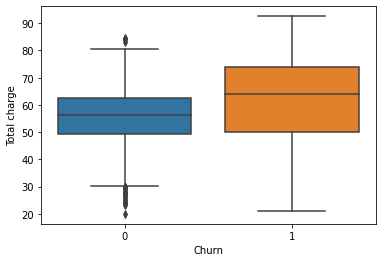

In [15]:
sns.boxplot(x="Churn", y="Total charge", data=data)

**Question 03 (of 05): What do you observe in the plot?**

**Answer:** The median total charge for the churned customer is more than that of the non-churned customers. Also, The maximum value is also quite large. The value of the median of churned customers is more than the Q3 of the non-churned customers.

**Task 10 (of 15): Visualize the number of churned and non-churned customers in each category of feature 'International plan'.**
_Hint:_ Use function `seaborn.countplot()` with the apropriate parameters. Make sure you group customers by feature 'Churn'!

<AxesSubplot:xlabel='Churn', ylabel='count'>

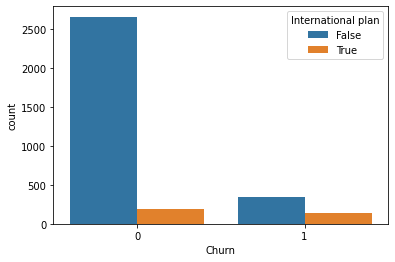

In [16]:
sns.countplot(x="Churn", hue="International plan", data=data)

**Task 11 (of 15): Visualize the number of churned and non-churned customers in each category of feature 'Customer service calls'.**
_Hint:_ Use function `seaborn.countplot()` with the apropriate parameters. Make sure you group customers by feature 'Churn'!

<AxesSubplot:xlabel='Churn', ylabel='count'>

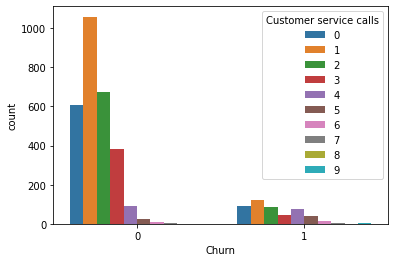

In [17]:
sns.countplot(x="Churn", hue="Customer service calls", data=data)

**Task 12 (of 15): Create a new Boolean feature named 'Many customer service calls' that indicates whether a user has made more than 3 customer service calls.**

In [18]:
data['Many customer service calls'] = data['Customer service calls'].apply(lambda x: True if x > 3 else False)

**Task 13 (of 15): Visualize the number of churned and non-churned customers in each category of feature 'Many customer service calls'.**
_Hint:_ Use function `seaborn.countplot()` with the apropriate parameters. Make sure you group customers by feature 'Churn'!

<AxesSubplot:xlabel='Churn', ylabel='count'>

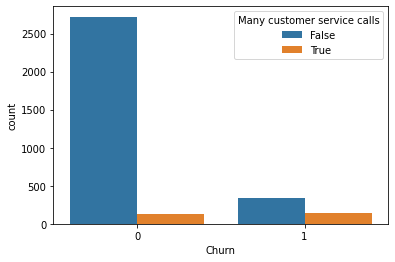

In [19]:
sns.countplot(x="Churn", hue="Many customer service calls", data=data)

**Question 04 (of 05): What do you observe in the plots?**

**Answer:** The number of many customer service calls is higher where there is customer churn. Also, relatively, the ratio of false to true is drastically different for churn and non-churn.

### Part 5: Making Conclusions

**Task 14 (of 15): Compute the churn rate (percentage of churned customers) for customers without international plan and for customers with international plan.**
_Hint:_ Use method `value_counts`.

In [20]:
# Compute churn rate for customers without international plan
num_churned = data.loc[data['International plan'] == False]['Churn'].value_counts()[1]
num_nonchurned = data.loc[data['International plan'] == False]['Churn'].value_counts()[0]
churn_rate = num_churned/(num_churned+num_nonchurned)
print(churn_rate)

0.11495016611295682


In [21]:
# Compute churn rate for customers with international plan
num_churned = data.loc[data['International plan'] == True]['Churn'].value_counts()[1]
num_nonchurned = data.loc[data['International plan'] == True]['Churn'].value_counts()[0]
churn_rate = num_churned/(num_churned+num_nonchurned)
print(churn_rate)

0.4241486068111455


**Task 15 (of 15): Compute the churn rate (percentage of churned customers) for customers with 3 customer service calls or less and for customers with more than 3 service calls.**
_Hint:_ Use method `value_counts`.

In [22]:
# Compute churn rate for customers with 3 customer service calls or less
num_churned = data.loc[data['Many customer service calls'] == False]['Churn'].value_counts()[1]
num_nonchurned = data.loc[data['Many customer service calls'] == False]['Churn'].value_counts()[0]
churn_rate = num_churned/(num_churned+num_nonchurned)
print(churn_rate)

0.11252446183953033


In [23]:
# Compute churn rate for customers with more than 3 customer service calls
num_churned = data.loc[data['Many customer service calls'] == True]['Churn'].value_counts()[1]
num_nonchurned = data.loc[data['Many customer service calls'] == True]['Churn'].value_counts()[0]
churn_rate = num_churned/(num_churned+num_nonchurned)
print(churn_rate)

0.5168539325842697


**Question 05 (of 05): What are your final conclusions from the exploration of features 'International plan' and 'Many customer service calls'? What other tasks would you perform to explore this dataset?**

**Answer:** The churn rate is higher when the customers have opted for an international plan. Similarly, the churn rate is higher when many customer service calls are made by the customer. Indicating that when more customer service calls are made, the customer is unhappy and atlast they discontiue the service. Also, the international plans don't seems to be satisfactory which might be another reason for higher churn rate.

We could also visualize the customer churn by the area code to see which area has the maximum churn. It could be because of bad network in that area.
Another way would be to visualize the churn data against the voice mail plan data. It could give insight into the fact if the voice mail service is not good enough leading to customer churn.